In [56]:
import random
import os

import pandas as pd
import numpy as np
import stereo as st
import copy
import scanpy as sc
import itertools

import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import Patch
from matplotlib.widgets import LassoSelector
import matplotlib.patches as mpatches
from skimage.draw import disk


random.seed(1)

# global params

In [2]:
# uncomment for each sample

sample_name = "E16.5_E1S1"
region = [26000, 35000, 4000, 20000]

#sample_name = "E16.5_E1S2"
#region = [0, 14500, 0, 50000]

#sample_name = "E16.5_E1S3"
#region = [0, 14500, 0, 50000]

#sample_name = "E16.5_E1S5"
#region = [26500, 50000, 0, 50000]

#sample_name = "E16.5_E2S5"
#region = [0, 16000, 0, 50000]

#sample_name = "E16.5_E2S7"
#region = [23000, 50000, 0, 50000]

#sample_name = "E16.5_E2S8"
#region = [0, 10000, 0, 50000]

#sample_name = "E16.5_E2S9"
#region = [28500, 50000, 0, 50000]

#sample_name = "E16.5_E2S10"
#region = [0, 10000, 0, 50000]

In [4]:
tissue_analysis = "brain_meninges"
gef_path = f"/mnt/storage3/projects/no_ngsd/ahhammv1_spatial_transcriptomics/data/{sample_name}/SAW_output/04.tissuecut/E16.tissue.gef"
bin_size = 30
out_dir = f"/mnt/storage3/projects/no_ngsd/ahhammv1_spatial_transcriptomics/edge_analysis/code/REBOSEP/notebooks/testing/{sample_name}/"

In [5]:
testing_out_dir = out_dir + "testing/"

try:
    os.makedirs(testing_out_dir, exist_ok=True)
except OSError as error:
    print(error)   

In [6]:
data_BACKUP = st.io.read_gef(file_path=gef_path, 
                             bin_size=bin_size, 
                             region=region)

[2025-11-24 13:20:43][Stereo][4152302][MainThread][131911823181632][reader][1070][INFO]: read_gef begin ...
[2025-11-24 13:23:17][Stereo][4152302][MainThread][131911823181632][reader][1241][INFO]: the matrix has 111414 cells, and 42126 genes.
[2025-11-24 13:23:17][Stereo][4152302][MainThread][131911823181632][reader][1242][INFO]: read_gef end.


In [7]:
# basic preprocessing________________________________________________
data_BACKUP.tl.cal_qc()

[2025-11-24 13:23:19][Stereo][4152302][MainThread][131911823181632][st_pipeline][41][INFO]: start to run cal_qc...
[2025-11-24 13:23:19][Stereo][4152302][MainThread][131911823181632][st_pipeline][44][INFO]: cal_qc end, consume time 0.8305s.


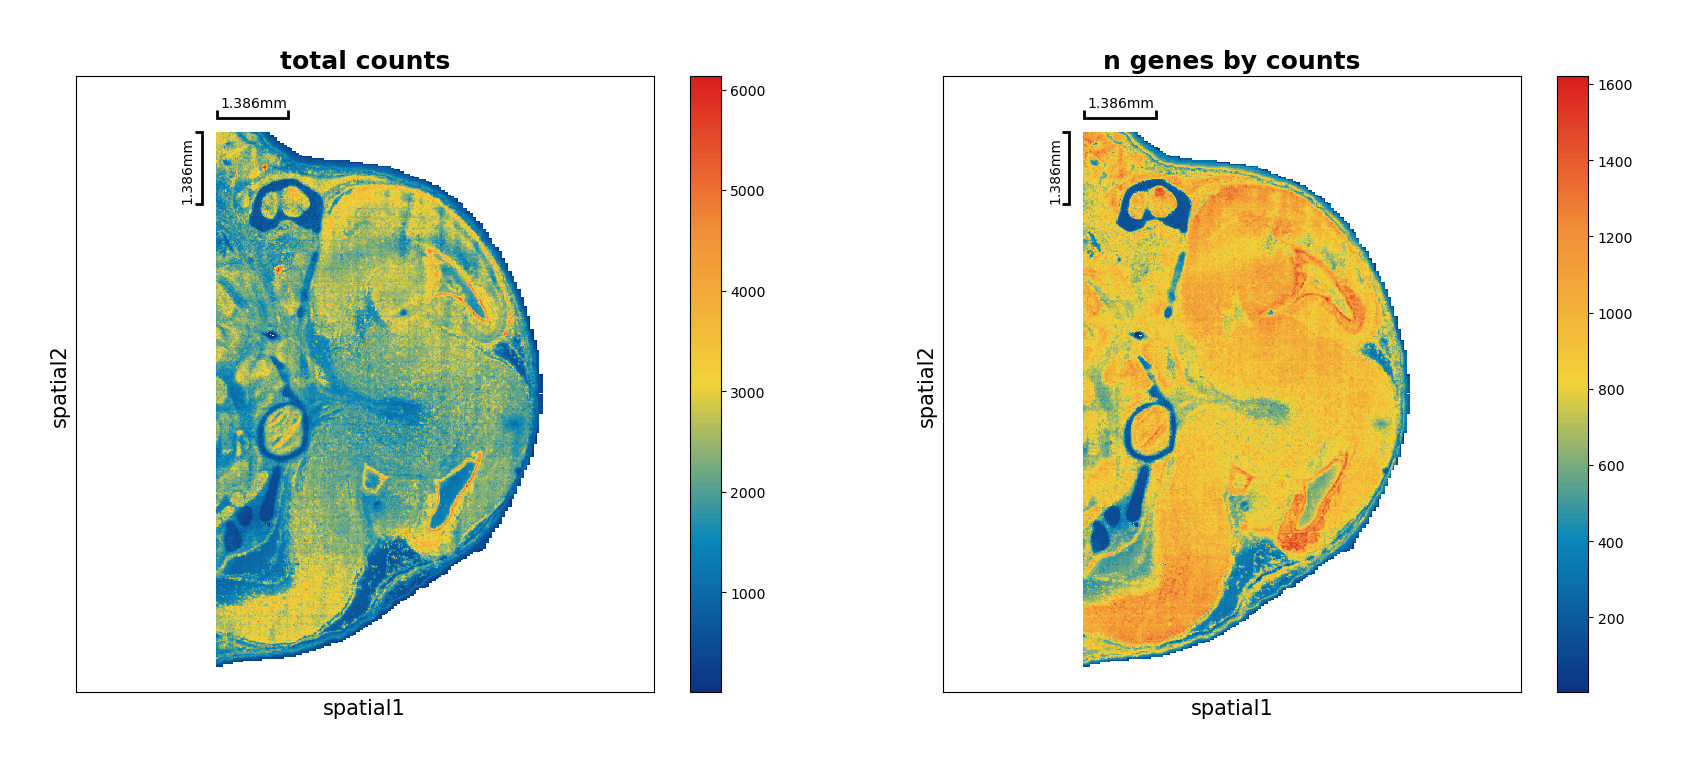

In [8]:
data_BACKUP.plt.spatial_scatter(out_path=f"{out_dir}{sample_name}_scatter_before.png",
                                out_dpi=300)

In [9]:
plt.close("all")
for qc_metric in ['total_counts', 'n_genes_by_counts', 'pct_counts_mt']:
    plt.violinplot(data_BACKUP.cells[qc_metric])
    plt.title(f"{sample_name}_{qc_metric}_before")
    plt.savefig(f"{out_dir}{sample_name}_{qc_metric}_before.png", dpi=300)
    plt.close("all")
    #plt.show() #closes them too

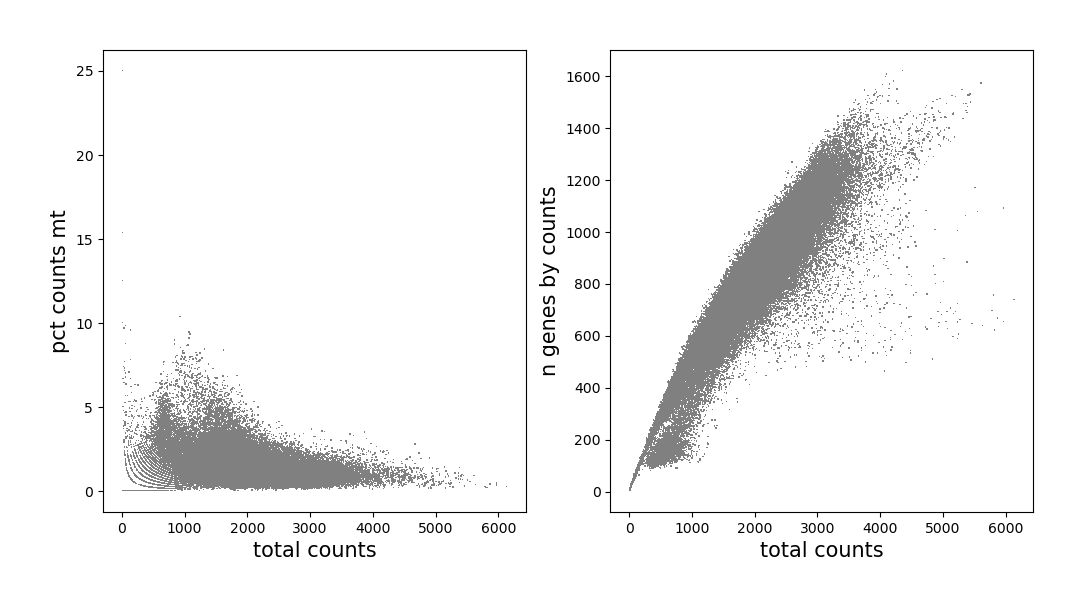

In [10]:
data_BACKUP.plt.genes_count(out_path=f"{out_dir}{sample_name}_count_before.png",
                            out_dpi=300)

In [11]:
data_BACKUP.tl.raw_checkpoint()

## filtering parameters

In [12]:
min_gene = 100
min_n_genes_by_counts = 50
pct_counts_mt = 7

[2025-11-24 13:23:29][Stereo][4152302][MainThread][131911823181632][st_pipeline][41][INFO]: start to run filter_cells...
[2025-11-24 13:23:32][Stereo][4152302][MainThread][131911823181632][st_pipeline][44][INFO]: filter_cells end, consume time 2.5497s.


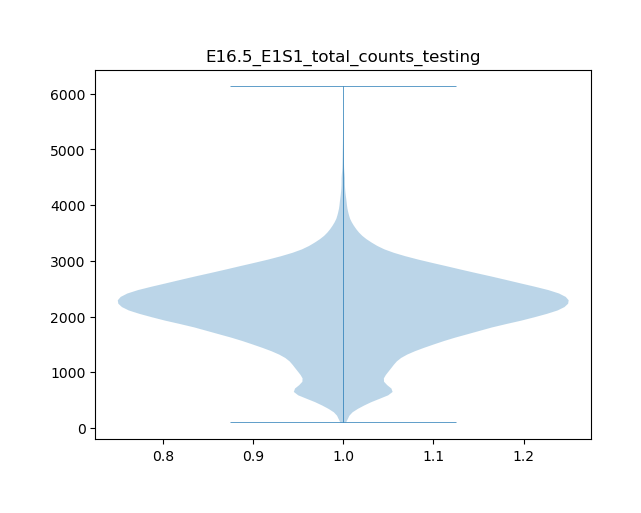

[2025-11-24 13:23:33][Stereo][4152302][MainThread][131911823181632][st_pipeline][41][INFO]: start to run filter_cells...
[2025-11-24 13:23:34][Stereo][4152302][MainThread][131911823181632][st_pipeline][44][INFO]: filter_cells end, consume time 1.5051s.


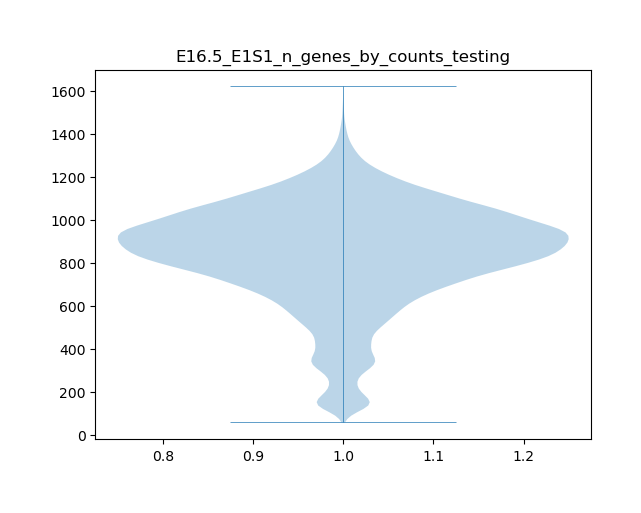

[2025-11-24 13:23:35][Stereo][4152302][MainThread][131911823181632][st_pipeline][41][INFO]: start to run filter_cells...
[2025-11-24 13:23:36][Stereo][4152302][MainThread][131911823181632][st_pipeline][44][INFO]: filter_cells end, consume time 1.4887s.


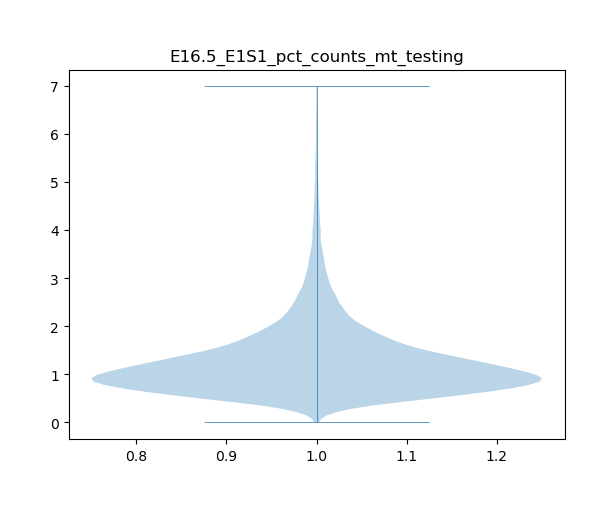

[2025-11-24 13:23:37][Stereo][4152302][MainThread][131911823181632][st_pipeline][41][INFO]: start to run filter_cells...
[2025-11-24 13:23:39][Stereo][4152302][MainThread][131911823181632][st_pipeline][44][INFO]: filter_cells end, consume time 1.4769s.
[2025-11-24 13:23:40][Stereo][4152302][MainThread][131911823181632][st_pipeline][41][INFO]: start to run filter_cells...
[2025-11-24 13:23:42][Stereo][4152302][MainThread][131911823181632][st_pipeline][44][INFO]: filter_cells end, consume time 2.3383s.


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

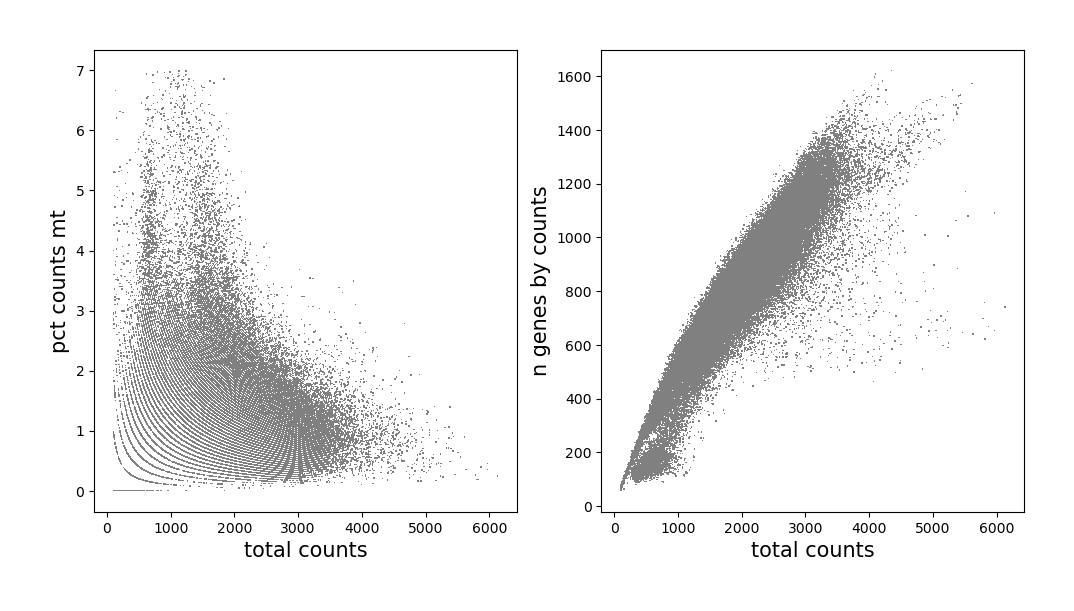

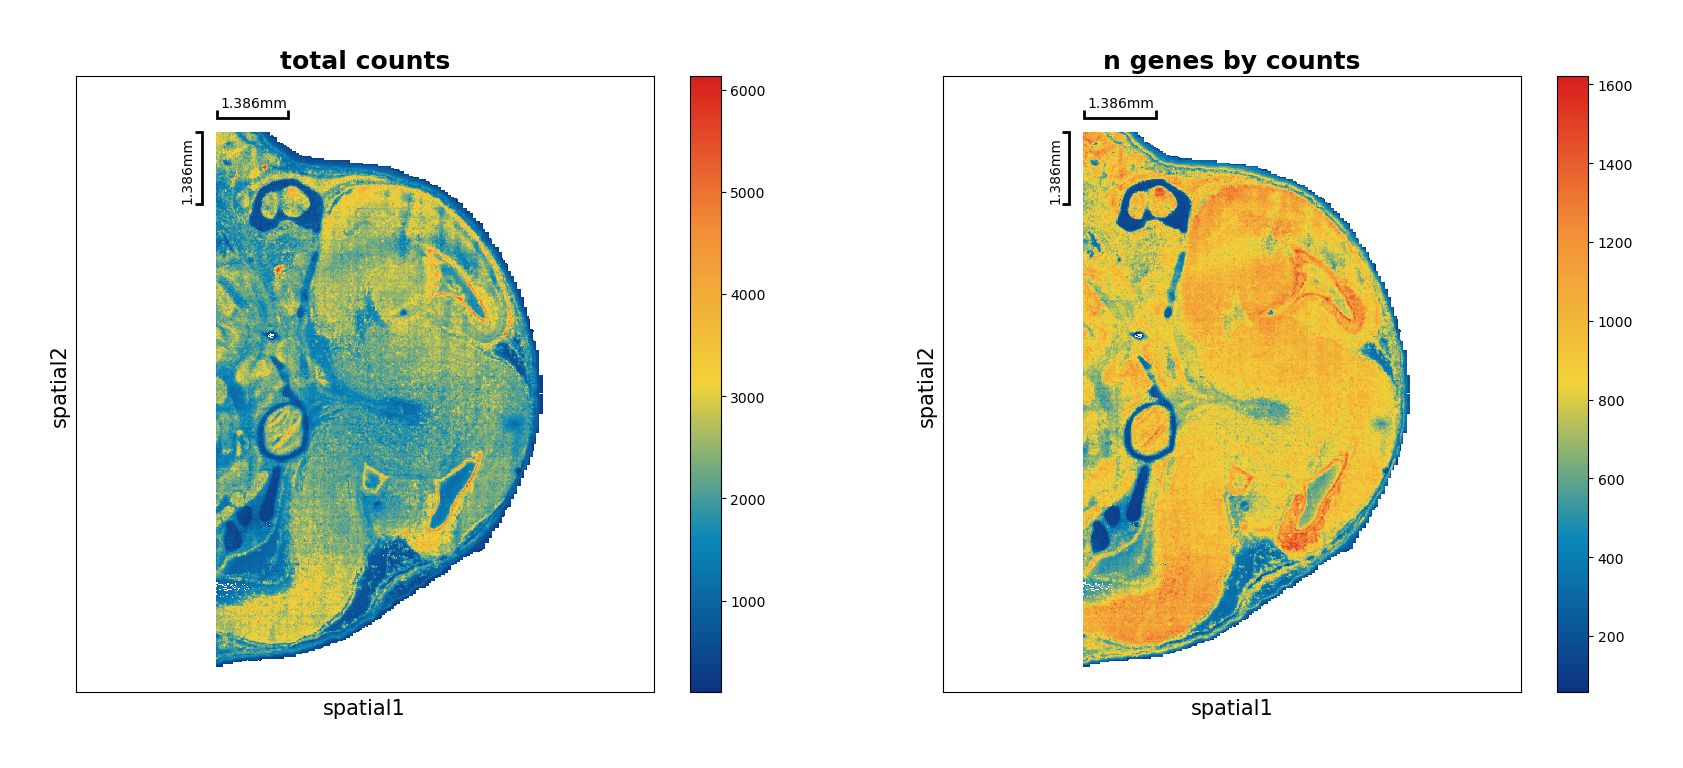

In [13]:
# testing different params
for qc_metric in ['total_counts', 'n_genes_by_counts', 'pct_counts_mt']:
    plt.violinplot(data_BACKUP.tl.filter_cells(min_gene=min_gene,
                            min_n_genes_by_counts=min_n_genes_by_counts,
                            pct_counts_mt=pct_counts_mt,
                            inplace=False
                            ).cells[qc_metric])
    plt.title(f"{sample_name}_{qc_metric}_testing")
    plt.show() 


data_BACKUP.tl.filter_cells(min_gene=min_gene,
                            min_n_genes_by_counts=min_n_genes_by_counts,
                            pct_counts_mt=pct_counts_mt,
                            inplace=False
                            ).plt.genes_count()

data_BACKUP.tl.filter_cells(min_gene=min_gene,
                            min_n_genes_by_counts=min_n_genes_by_counts,
                            pct_counts_mt=pct_counts_mt,
                            inplace=False
                            ).plt.spatial_scatter()


# applying params

In [14]:
data_BACKUP.tl.filter_cells(min_gene=min_gene,
                            min_n_genes_by_counts=min_n_genes_by_counts,
                            pct_counts_mt=pct_counts_mt,
                            inplace=True
                            )

for qc_metric in ['total_counts', 'n_genes_by_counts', 'pct_counts_mt']:
    plt.violinplot(data_BACKUP.cells[qc_metric])
    plt.title(f"{sample_name}_{qc_metric}_filtered")
    plt.savefig(f"{out_dir}{sample_name}_{qc_metric}_filtered.png", dpi=300)
    plt.close() #closes them too

data_BACKUP.plt.genes_count()
plt.savefig(f"{out_dir}{sample_name}_count_filtered.png")
plt.close()

data_BACKUP.plt.spatial_scatter()
plt.savefig(f"{out_dir}{sample_name}_scatter_filtered.png")
plt.close()

data_BACKUP.tl.raw_checkpoint()

[2025-11-24 13:23:58][Stereo][4152302][MainThread][131911823181632][st_pipeline][41][INFO]: start to run filter_cells...
[2025-11-24 13:24:00][Stereo][4152302][MainThread][131911823181632][st_pipeline][44][INFO]: filter_cells end, consume time 1.7811s.


# Heatmaps

In [15]:
def plot_heatmap_stereo(data, 
                        genes=None, 
                        region=None, 
                        num_x_ticks=10, 
                        num_y_ticks=10, 
                        title="",
                        out_path="",
                        out_dpi=300): # genes either ["all"] or list of genes
    if isinstance(data, st.core.stereo_exp_data.StereoExpData):
        df_tmp = data.tl.raw.to_df()
        df_tmp["x"] = pd.DataFrame(data.position[:,0], index = data.cell_names)
        df_tmp["y"] = pd.DataFrame(data.position[:,1], index = data.cell_names)  
    if genes is None:
        df_tmp["total"] = df_tmp.sum(axis=1)
    else:
        genes = [gene for gene in genes if gene in df_tmp.columns]
        if len(genes) == 0:
            raise Warning('none of the genes found')
            return
        df_tmp['total'] = df_tmp.loc[:,genes].sum(axis=1)
    
    
    table = df_tmp.pivot("y", "x", "total") # x and y inverted so that matrix orientation fits image
    if region is not None:
        table = table.loc[region[2]:region[3], region[0]:region[1]]
    
    plt.imshow(table)
    plt.axis('off')
    cbar = plt.colorbar(label=f'exp. {" + ".join(str(i) for i in genes)}', ticks=None)
    cbar.set_ticks([0,np.nanmax(table.values)])
    cbar.set_ticklabels(["min","max"])
    
    if title != "":
        plt.title(title)
    
    if out_path == "":
        plt.show()
    else:
        plt.savefig(out_path, dpi=out_dpi)
        plt.close()


In [16]:
plt.close("all")

plot_heatmap_stereo(data_BACKUP, genes=["Defb11", "Kcne2", "Htr2c", "Dynlrb2" , "Ttr", "Enpp2", "Igfbp2"], title="Choroid plexus", out_path=f"{out_dir}{sample_name}_Choroid_plexus.png", out_dpi=300)
plot_heatmap_stereo(data_BACKUP, genes=["Tfap2b", "Lhx9", "Zic1"], title="Dorsal midbrain neuron", out_path=f"{out_dir}{sample_name}_dorsal_midbrain_neuron.png", out_dpi=300)
plot_heatmap_stereo(data_BACKUP, genes=["Neurod6", "Tbr1", "Neurod2"], title="Forebrain neuron", out_path=f"{out_dir}{sample_name}_forebrain_neuron.png", out_dpi=300)
plot_heatmap_stereo(data_BACKUP, genes=["Fabp7", "Sox2", "Pou3f3"], title="Forebrain radial glia", out_path=f"{out_dir}{sample_name}_forebrain_radial_glia.png", out_dpi=300)
plot_heatmap_stereo(data_BACKUP, genes=["Ptgds", "Trpm3", "Ranbp3l"], title="Meninges cell", out_path=f"{out_dir}{sample_name}_Meninges_cell.png", out_dpi=300)
plot_heatmap_stereo(data_BACKUP, genes=["Onecut2", "Otx2"], title="Meninges", out_path=f"{out_dir}{sample_name}_meninges.png", out_dpi=300)
plot_heatmap_stereo(data_BACKUP, genes=["Rtn1", "Nnat", "Stmn2"], title="Mid-/hindbrain and spinal cord neuron", out_path=f"{out_dir}{sample_name}_mid_and_hindbrain_and_spinal_cord_neuron.png", out_dpi=300)
plot_heatmap_stereo(data_BACKUP, genes=["Sox2", "Sox1", "Fabp7", "Pou3f2", "Foxd1"], title="Brain", out_path=f"{out_dir}{sample_name}_brain.png", out_dpi=300)
plot_heatmap_stereo(data_BACKUP, genes=["Tcf7l2", "Ntng1", "Tenm2"], title="Diencephalon neuron", out_path=f"{out_dir}{sample_name}_diencephalon_neuron.png", out_dpi=300)
plot_heatmap_stereo(data_BACKUP, genes=["Eln", "Fbln5"], title="Blood vessel", out_path=f"{out_dir}{sample_name}_blood_vessel.png", out_dpi=300)
plot_heatmap_stereo(data_BACKUP, genes=["Krt15", "Krt5"], title="Epidermis", out_path=f"{out_dir}{sample_name}_epidermis.png", out_dpi=300)

genes=[["Lhx2", "Gli3"],
       ["Spc25", "Qk"],
       ["Tcf4", "Pantr1"],
       ["Dlx1", "Dhfr"],
       ["Dlx1", "Dlx5"],
       ["Ccnd2", "Reln"],
       ["Neurod6", "Tbr1", "Eomes"],
       ["Map1b", "Bcl11b"],
       ["Tcf4", "Satb2"],
       ["Nfib", "Rbfox1"],
       ["Snca", "Nts"],
       ["Otp", "Peg10"],
       ["Pcp4", "Igsf5", "Adarb2"],
       ["Tcf7l2", "Kitl"],
       ["Vim", "Hes5"],
       ["Shox2", "Lhx9"],
       ["Lhx9", "Pcp4"],
       ["Th", "Snca"],
       ["Phgdh", "Dbi"],
       ["Glis3", "Lrp4", "Gria1"],
       ["Insm1", "Pvalb"],
       ["Map1b", "Lrba"],
       ["Slc1a3", "Tnc"],
       ["Hoxa5", "Msx1"],
       ["Nefl", "Sncg", "Nefm"],
       ["Ebf1", "Ebf2"],
       ["Nrg3", "Snhg11"],
       ["Aldh1l1", "Slc1a3", "Ptprz1"],
       ["Gad1", "Gad2"],
       ["Mest", "Matn1"],
       ["Rspo1", "Rspo3", "Dynlrb2"],
       ["Ttr", "Dynlrb2"],
       ["Ftl1", "Lgals1"],
       ["Dcn", "Cdh11"]]
for gene_set in genes:
    plot_heatmap_stereo(data_BACKUP, genes=gene_set, title="", out_path=f"{testing_out_dir}{sample_name}_{*gene_set,}.png", out_dpi=300)


In [17]:
data = copy.deepcopy(data_BACKUP)
data.tl.raw_checkpoint()

# running leiden clustering
data.tl.sctransform(res_key='sctransform', n_genes=2000, inplace=True)
data.tl.pca(use_highly_genes=False, n_pcs=30, res_key='pca')
data.tl.neighbors(pca_res_key='pca', n_pcs=30, res_key='neighbors')
data.tl.umap(pca_res_key='pca', neighbors_res_key='neighbors', res_key='umap')

[2025-11-24 13:32:32][Stereo][4152302][MainThread][131911823181632][st_pipeline][41][INFO]: start to run sctransform...
[2025-11-24 13:32:34][Stereo][4152302][MainThread][131911823181632][sctransform][89][INFO]: using default random_seed 1448145, will run SCT without randomness
[2025-11-24 13:33:12][Stereo][4152302][MainThread][131911823181632][vst][123][INFO]: gene-cell umi shape (30824, 111122), n_genes 2000 n_cells 5000
[2025-11-24 13:33:59][Stereo][4152302][MainThread][131911823181632][vst][137][INFO]: get_model_pars finished, cost 42.90918183326721 seconds
[2025-11-24 13:34:03][Stereo][4152302][MainThread][131911823181632][vst][307][INFO]: ksmooth finished, cost 1.5031654834747314 seconds
[2025-11-24 13:34:03][Stereo][4152302][MainThread][131911823181632][vst][155][INFO]: reg_model_pars finished, cost 4.05797815322876 seconds
[2025-11-24 13:35:57][Stereo][4152302][MainThread][131911823181632][vst][180][INFO]: pearson_residual cost 113.7230589389801 seconds
[2025-11-24 13:43:41][St

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs


[2025-11-24 13:45:27][Stereo][4152302][MainThread][131911823181632][st_pipeline][44][INFO]: umap end, consume time 63.6932s.


In [18]:
def plot_clustering_ranges(data, 
                           sample_name, 
                           path, 
                           leiden_range=[0.05, 0.075, 0.1, 0.15, 0.2], 
                           verbose=True, 
                           seed=1, 
                           plot_umap=False):
    if verbose:
        print(f"Plotting ranges of clustering resolutions")
    
    for res in leiden_range:
        if verbose:
            print(f"Working on resolution: {res}")
        data.tl.leiden(neighbors_res_key="neighbors", res_key="leiden", resolution=res, random_state=seed) # random_state=0 is default
        
        data.plt.cluster_scatter(res_key="leiden")
        plt.tight_layout()
        plt.savefig(f"{path}{sample_name}_leiden_{res}.png")
        plt.close()
        
        if plot_umap:
            data.plt.umap(res_key='umap', cluster_key='leiden')
            plt.tight_layout()
            plt.savefig(f"{path}{sample_name}_leiden_{res}_umap.png")
            plt.close()


In [19]:
plot_clustering_ranges(data, sample_name, f"{testing_out_dir}", leiden_range=[0.05, 0.07, 0.09, 0.11, 0.13, 0.15, 0.17, 0.2, 0.23])

[2025-11-24 13:46:37][Stereo][4152302][MainThread][131911823181632][st_pipeline][41][INFO]: start to run leiden...


Plotting ranges of clustering resolutions
Working on resolution: 0.05


[2025-11-24 13:46:52][Stereo][4152302][MainThread][131911823181632][st_pipeline][44][INFO]: leiden end, consume time 15.0030s.
[2025-11-24 13:46:53][Stereo][4152302][MainThread][131911823181632][st_pipeline][41][INFO]: start to run leiden...


Working on resolution: 0.07


[2025-11-24 13:47:12][Stereo][4152302][MainThread][131911823181632][st_pipeline][44][INFO]: leiden end, consume time 18.1016s.
[2025-11-24 13:47:13][Stereo][4152302][MainThread][131911823181632][st_pipeline][41][INFO]: start to run leiden...


Working on resolution: 0.09


[2025-11-24 13:47:37][Stereo][4152302][MainThread][131911823181632][st_pipeline][44][INFO]: leiden end, consume time 23.8212s.
[2025-11-24 13:47:38][Stereo][4152302][MainThread][131911823181632][st_pipeline][41][INFO]: start to run leiden...


Working on resolution: 0.11


[2025-11-24 13:47:59][Stereo][4152302][MainThread][131911823181632][st_pipeline][44][INFO]: leiden end, consume time 21.4826s.
[2025-11-24 13:48:01][Stereo][4152302][MainThread][131911823181632][st_pipeline][41][INFO]: start to run leiden...


Working on resolution: 0.13


[2025-11-24 13:48:28][Stereo][4152302][MainThread][131911823181632][st_pipeline][44][INFO]: leiden end, consume time 26.3605s.
[2025-11-24 13:48:29][Stereo][4152302][MainThread][131911823181632][st_pipeline][41][INFO]: start to run leiden...


Working on resolution: 0.15


[2025-11-24 13:49:01][Stereo][4152302][MainThread][131911823181632][st_pipeline][44][INFO]: leiden end, consume time 32.6064s.
[2025-11-24 13:49:03][Stereo][4152302][MainThread][131911823181632][st_pipeline][41][INFO]: start to run leiden...


Working on resolution: 0.17


[2025-11-24 13:49:30][Stereo][4152302][MainThread][131911823181632][st_pipeline][44][INFO]: leiden end, consume time 27.5627s.
[2025-11-24 13:49:32][Stereo][4152302][MainThread][131911823181632][st_pipeline][41][INFO]: start to run leiden...


Working on resolution: 0.2


[2025-11-24 13:49:52][Stereo][4152302][MainThread][131911823181632][st_pipeline][44][INFO]: leiden end, consume time 19.8033s.
[2025-11-24 13:49:53][Stereo][4152302][MainThread][131911823181632][st_pipeline][41][INFO]: start to run leiden...


Working on resolution: 0.23


[2025-11-24 13:50:24][Stereo][4152302][MainThread][131911823181632][st_pipeline][44][INFO]: leiden end, consume time 30.6316s.


## Calculate final Leiden result

In [ ]:
# E16.5_E1S1
final_leiden_res = 0.07

# E16.5_E1S2
final_leiden_res = 0.09

# E16.5_E1S3
final_leiden_res = 0.07

# E16.5_E1S5
final_leiden_res = 0.15

# E16.5_E2S5
final_leiden_res = 0.05

# E16.5_E2S7
final_leiden_res = 0.05

# E16.5_E2S8
final_leiden_res = 0.07

# E16.5_E2S9
final_leiden_res = 0.07

# E16.5_E2S10
final_leiden_res = 0.05


In [20]:
data.tl.leiden(neighbors_res_key="neighbors", 
               res_key="leiden", 
               resolution=final_leiden_res, 
               random_state=1)

[2025-11-24 13:50:25][Stereo][4152302][MainThread][131911823181632][st_pipeline][41][INFO]: start to run leiden...
[2025-11-24 13:50:44][Stereo][4152302][MainThread][131911823181632][st_pipeline][44][INFO]: leiden end, consume time 19.2766s.


In [21]:
def set_cluster_names(data,
                      resolution,
                      cluster_dic,
                      verbose = True, 
                      path=None,
                      annotation_key="leiden_annotated",
                      algorithm="leiden"):
    """
    add column with tissue annotations to anndata.obs
    """
    if verbose:
        print("Setting cluster names.")
    
    temp_data = copy.deepcopy(data.tl.result[algorithm])
    temp_data["group"] = temp_data["group"].astype("str")
    temp_data["annotation"] = "other"
    
    for leiden_cluster in cluster_dic:
        temp_data.loc[(temp_data['group'] == str(leiden_cluster)), 'annotation'] = cluster_dic[leiden_cluster]
    
    temp_data["group"] = temp_data["annotation"]
    data.tl.result._set_cluster_res(annotation_key, temp_data) # stereopy has different types of result. "cluster_res" can only save one column called "group". https://github.com/STOmics/Stereopy/blob/main/stereo/core/result.py
    

In [ ]:
names_dic = 

# E16.5_E1S1
names_dic = dict([(1, "brain"), (2, "meninges"), (3, "brain"), (4, "meninges"), (5, "meninges"), (8, "ventricle")]),

# E16.5_E1S2
names_dic = dict([(1, "meninges"), (2, "brain"), (3, "brain"), (4, "meninges"), (5, "other")]),

# E16.5_E1S3
names_dic = dict([(1, "brain"), (2, "meninges"), (3, "meninges"), (4, "brain")]),

# E16.5_E1S5
names_dic = dict([(1, "brain"), (2, "meninges"), (3, "meninges"), (4, "brain"), (5, "brain"), (6, "meninges"), (8, "brain")]),

# E16.5_E2S5
names_dic = dict([(1, "meninges"), (2, "brain"), (3, "brain")]),

# E16.5_E2S7
names_dic = dict([(1, "meninges"), (2, "brain"), (3, "brain"), (4, "meninges"), (5, "other")]),

# E16.5_E2S8
names_dic = dict([(1, "meninges"), (2, "brain"), (3, "brain")]),

# E16.5_E2S9
names_dic = dict([(1, "meninges"), (2, "brain"), (3, "brain")])

# E16.5_E2S10
names_dic = dict([(1, "meninges"), (2, "brain"), (3, "brain")]),

In [22]:
set_cluster_names(data, 
                  final_leiden_res,
                  names_dic,
                  verbose = True, 
                  annotation_key="leiden_annotated",
                  algorithm="leiden")

Setting cluster names.


## Conversion to anndata

In [23]:
anndata = st.io.stereo_to_anndata(data, flavor="scanpy")
anndata_BACKUP = st.io.stereo_to_anndata(data_BACKUP, flavor="scanpy")
sc.pp.normalize_total(anndata_BACKUP, target_sum=1e4)
anndata_BACKUP.obs = anndata.obs

anndata = copy.deepcopy(anndata_BACKUP)

[2025-11-24 13:50:45][Stereo][4152302][MainThread][131911823181632][reader][821][INFO]: Adding sample in adata.obs['orig.ident'].
[2025-11-24 13:50:45][Stereo][4152302][MainThread][131911823181632][reader][824][INFO]: Adding data.position as adata.obsm['spatial'] .
[2025-11-24 13:50:45][Stereo][4152302][MainThread][131911823181632][reader][829][INFO]: Adding data.position as adata.obs['x'] and adata.obs['y'] .
[2025-11-24 13:50:45][Stereo][4152302][MainThread][131911823181632][reader][881][INFO]: Adding data.tl.result['pca'] into adata.obsm['X_pca'] .
[2025-11-24 13:50:45][Stereo][4152302][MainThread][131911823181632][reader][889][INFO]: Adding data.tl.result['neighbors']['connectivities'] into adata.obsp['connectivities'] .
[2025-11-24 13:50:45][Stereo][4152302][MainThread][131911823181632][reader][890][INFO]: Adding data.tl.result['neighbors']['nn_dist'] into adata.obsp['distances'] .
[2025-11-24 13:50:45][Stereo][4152302][MainThread][131911823181632][reader][893][INFO]: Adding info 

In [29]:
def filter_regions(data_df, 
                   column_to_filter_key="leiden_annotated",
                   filtered_annotation_key="filtered_annotated",
                   too_small_label="too_small",
                   x_column="x",
                   y_column="y",
                   region_num_key="region_num_key",
                   min_region_size=500,
                   verbose=True):
    """
    filters regions by size
    """
    
    if verbose:
        print("filtering regions by size")
    
    # deleting old results    
    try:
        data_df = data_df.drop(columns=[region_num_key], errors="raise")
        if verbose: 
            print("deleted previous region num key result!")
    except KeyError:
        print("no region num key column found. If first pass, all good.")
    except Exception:
        raise ValueError('Removing of region num key failed. ERROR SOURCE UNKNOWN!')
    
    # creating matrix of regions
    region_df = data_df.astype({y_column:int, x_column:int})
    region_np = region_df.pivot(index=y_column, 
                                columns=x_column, 
                                values=column_to_filter_key).to_numpy()
    
    # detecting all regions, regardless of size
    checked = set()              # bins already checked, "{i}_{j}" format
    to_check = []                # detected bins, still left to check
    unique_regions = dict()
    too_small_regions = []
    region_num = 0
    
    for i in range(0, len(region_np)-1):
        for j in range(len(region_np[i])-1):
            if f"{i}_{j}" not in checked:        # every bin that still needs to be checked (doesnt yet belong to a region) starts detection of all bins belong to its region
                to_check = [[i, j]]
                unique_regions[region_num] = set()
                
                checked, unique_regions = bin_recursion(to_check, checked, unique_regions, region_num, region_np[i][j], region_np)
                if len(unique_regions[region_num]) < min_region_size:
                    too_small_regions += unique_regions[region_num]
                    del unique_regions[region_num]
                else:
                    region_num = region_num+1
    
    if region_num == 0:
        raise ValueError(f"No region big enough.")

    x_arr = []
    y_arr = []
    bin_coords_x = np.unique(np.sort(region_df["x"].values))
    bin_coords_y = np.unique(np.sort(region_df["y"].values))                            
    
    region_num_key_arr = []
    for region_id in unique_regions:
        for coordinates in unique_regions[region_id]:
            
            x_arr.append(bin_coords_x[int(coordinates.split("_")[1])])   # i = y coordinate
            y_arr.append(bin_coords_y[int(coordinates.split("_")[0])])   #j = x coordinate
            region_num_key_arr.append(region_id)
    
    unique_regions_df = pd.DataFrame({x_column: x_arr, y_column: y_arr, region_num_key: region_num_key_arr})

    new_obs = region_df.merge(unique_regions_df, on=[x_column, y_column], how='left') # has two x, and two y columns.
    new_obs.index = new_obs.index.astype('str')  # anndata expects index to be str

    new_obs[filtered_annotation_key] = new_obs[column_to_filter_key]
    new_obs.loc[new_obs[region_num_key].isna(), filtered_annotation_key] = np.nan

    
    return new_obs


def bin_recursion(to_check, 
                  checked, 
                  unique_regions, 
                  region_num, 
                  current_tissue, 
                  region_np):
    """
    finds all bins belonging to the same region
    """
    
    for position in to_check:
        i = position[0]
        j = position[1]
        
        if not (0 <= i < region_np.shape[0]):
            continue
        if not (0 <= j < region_np.shape[1]):
            continue
        if f"{i}_{j}" in checked:
            continue
        if current_tissue != region_np[i][j]:
            continue
        
        checked.add(f"{i}_{j}")
        #print("adding")
        unique_regions[region_num].add(f"{i}_{j}")
        to_check.extend([[i, j+1],  
                         [i, j-1],  
                         [i+1, j],  
                         [i-1, j],  
                         [i+1, j+1],
                         [i-1, j+1],
                         [i-1, j-1],
                         [i+1, j-1],
                         ])
    
    return checked, unique_regions


In [30]:
plt.close("all")
anndata.obs = filter_regions(anndata.obs,
                             column_to_filter_key="leiden_annotated", 
                             filtered_annotation_key ="filtered_annotated", 
                             region_num_key="region_num_key",
                             min_region_size=700)

filtering regions by size
no region num key column found. If first pass, all good.


In [31]:
def set_annotation_by_region(df, 
                             region=None, 
                             annotation=None,
                             annotation_key="filtered_annotated",
                             region_num_key="region_num_key"):

    """
    used to set annotation of individual detected regions
    """
    
    if region == None or annotation == None:
        raise ValueError('ERROR: Region or annotation not set')

    df[annotation_key] = np.where(df[region_num_key] == region,
                                  annotation,
                                  df[annotation_key])

    return df


In [32]:
anndata.obs = set_annotation_by_region(anndata.obs, 
                                       region=4, 
                                       annotation="ventricle",
                                       annotation_key="filtered_annotated",
                                       region_num_key="region_num_key")

In [34]:
def plot_obs_column(anndata, 
                    column_key): 
    """
    visualize one column of the anndata.obs dataframe
    """
    
    temp = copy.deepcopy(anndata.obs)  
    temp[column_key].unique()
    
    translation = dict()
    rev_translation = dict()
    
    i = 1
    values = temp[column_key].unique()
    values = values[~pd.isnull(values)]
    for val in values:
        translation[val] = i
        rev_translation[i] = val
        i += 1
    
    temp["_translated"] = temp.replace({column_key: translation})[column_key]
    
    table = temp.pivot(index="y", 
                       columns="x", 
                       values="_translated") # x and y inverted so that matrix orientation fits image
    table = table.astype(np.float32)
    
    #values = np.unique(table.values.ravel())
    im = plt.imshow(table, cmap="Set1", interpolation="none")
    plt.axis('off')
    #https://stackoverflow.com/questions/25482876/how-to-add-legend-to-imshow-in-matplotlib
    colors = [im.cmap(im.norm(value+1)) for value in range(len(values))]
    patches = [ mpatches.Patch(color=colors[i], label="{l}".format(l=rev_translation[i+1]) ) for i in range(len(values)) ] # i+1 because translation dic starts at 1 
    plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )


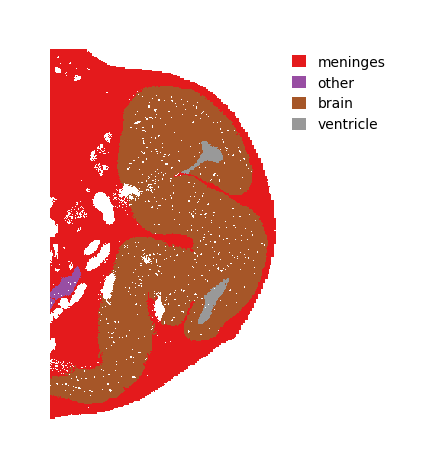

In [35]:
plt.close("all")
plot_obs_column(anndata, "filtered_annotated")

In [46]:
def find_boundary_distances(obs, 
                            clusters,
                            x_column="x",
                            y_column="y",
                            clusters_key="filtered_annotated",
                            is_boundary_key_prefix="is_boundary_",
                            min_boundary_length = 100,
                            boundary_dist_key_prefix="boundary_dist_",
                            boundary_range = 1,
                            max_dist=20,
                            print_modulo=1,
                            verbose=True):
    
    """
    calculates the distance of bins from the boundary
    """
    
    region_np = obs.pivot(index=y_column, 
                          columns=x_column,
                          values=clusters_key).to_numpy() # x and y inverted so that matrix orientation fits image

    cluster_a = clusters[0]
    cluster_b = clusters[1]
    new_obs = obs.copy()

    new_col_name = boundary_dist_key_prefix + cluster_a + "_" + cluster_b
    is_boundary_col_name = is_boundary_key_prefix + cluster_a + "_" + cluster_b

    # deleting old results
    if verbose:
        print(f"detecting boundaries between {cluster_a} and {cluster_b}")
    try:
        new_obs = new_obs.drop(columns=[new_col_name], errors="raise")
        if verbose: 
            print("deleted previous boundary result!")
    except KeyError:
        if verbose:
            print("no boundary column found. If first pass, all good")
    except Exception:
        raise ValueError('Removing of boundary failed. ERROR SOURCE UNKNOWN!')
    
    # detect all boundary bins between two relevant annotations
    is_boundary_arr = np.full((len(region_np), len(region_np[0])), False)
    for i in range(len(region_np)):
        for j in range(len(region_np[0])):
            if is_boundary_bin(region_np, i, j, [cluster_a, cluster_b]):
                is_boundary_arr[i][j] = True
    
    if verbose:
        print("running boundary recursion")

    checked = set()
    unique_boundaries = {}
    unique_boundary_id = 0
    for i in range(len(is_boundary_arr)):
        for j in range(len(is_boundary_arr[0])):
            if f"{i}_{j}" not in checked:
                boundary_elements, checked = boundary_recursion(is_boundary_arr, [f"{i}_{j}"], checked, boundary_range)
                if len(boundary_elements) > 0:
                    unique_boundaries[unique_boundary_id] = boundary_elements
            unique_boundary_id += 1

    max_length = 0
    for k in list(unique_boundaries.keys()):
        max_length = max(max_length, len(unique_boundaries[k]))
        if len(unique_boundaries[k]) < min_boundary_length:
            del unique_boundaries[k]
    
    
    if len(unique_boundaries) == 0:
        #raise ValueError(f"No boundaries long enough. Max length: {max_length}")
        raise ValueError(f"No boundary long enough found between {cluster_a} and {cluster_b}. Max length found: {max_length}")
    
    boundaries_arr_bool = np.full((len(is_boundary_arr), len(is_boundary_arr[0])), False)
    for k in unique_boundaries.keys():
        for coord in unique_boundaries[k]:
            i = int(coord.split("_")[0])
            j = int(coord.split("_")[1])
            boundaries_arr_bool[i][j] = True

    new_obs = create_new_obs(boundaries_arr_bool,
                             new_obs,
                             is_boundary_col_name,
                             x_column="x",
                             y_column="y")
    
    print("running distance detection")
    #4. pad up to max wanted dist
    boundary_distance_table = calculate_boundary_distance(new_obs,  
                                                          max_dist= max_dist,
                                                          testing_out_dir="", 
                                                          is_boundary_key=is_boundary_col_name, 
                                                          boundary_dist_key=new_col_name, 
                                                          filtered_clusters_key=clusters_key, 
                                                          verbose=True,
                                                          print_modulo=print_modulo)

    
    
    boundary_distance_column = pd.DataFrame(data=boundary_distance_table,    # values
                                            index=np.sort(new_obs[y_column].unique()),    # 1st column as index
                                            columns=np.sort(new_obs[x_column].unique()))  # 1st row as the column names
    boundary_distance_column = boundary_distance_column.stack().reset_index(name=new_col_name)
    boundary_distance_column = boundary_distance_column.rename(columns={"level_0": y_column, "level_1": x_column})
    
    new_obs["_bin_names"] = new_obs.index
    new_obs = pd.merge(new_obs, boundary_distance_column,  how='left', left_on=[x_column, y_column], right_on = [x_column, y_column])
    new_obs.index = new_obs["_bin_names"]
    new_obs = new_obs.drop('_bin_names', axis=1)
    
    new_obs.loc[~new_obs[clusters_key].isin(clusters), new_col_name] = np.nan
    new_obs=new_obs.drop(columns=[is_boundary_col_name], errors="raise")
    
    return new_obs


def calculate_boundary_distance(obs,
                                max_dist = 20,
                                x_column="x",
                                y_column="y",
                                testing_out_dir="", 
                                is_boundary_key="is_boundary", 
                                boundary_dist_key="boundary_dist", 
                                filtered_clusters_key="filtered_annotated", 
                                verbose=True,
                                print_modulo=1):

    """
    performs detection of bin distances
    """
    is_boundary_table = obs.pivot(index=y_column, columns=x_column, values=is_boundary_key).values
    annotation_table = obs.pivot(index=y_column, columns=x_column, values=filtered_clusters_key).values
    boundary_distance_table = np.full((len(is_boundary_table), len(is_boundary_table[0])), np.nan)

    # precompute disks, only keeping outer ring to minimize redundant checks
    disc_dic = {1: [(0), (0)]}
    for n in range(max_dist, 1, -1):
        coords         = disk((0,0), n)
        coords         = list(zip(coords[0], coords[1]))
        coords_smaller = disk((0,0), n-1)
        coords_smaller = list(zip(coords_smaller[0], coords_smaller[1]))
        coords = [coord for coord in coords if coord not in coords_smaller]
        coords = list(zip(*coords))
        disc_dic[n] = coords

    # settings distances
    for n in range(max_dist, 0, -1):
        if verbose and n%print_modulo == 0:
            print(f"calculating bins with boundary distance: {n}")
        for i in range(0, len(is_boundary_table)-1):
            for j in range(len(is_boundary_table[i])-1):
                if is_boundary_table[i][j] and not np.isnan(is_boundary_table[i][j]):

                    current_tissue = annotation_table[i][j]

                    coords = disc_dic[n]
                    coords = np.array(coords)
                    coords[0] += i
                    coords[1] += j

                    mask = (coords[0] >= 0) & (coords[1] >= 0) & (coords[0] < len(is_boundary_table)) & (coords[1] < len(is_boundary_table[0])) # removing coordinates outside of array
                    coords_x = coords[0]
                    coords_y = coords[1]
                    coords_x = coords_x[mask]
                    coords_y = coords_y[mask]

                    coords = [coords_x, coords_y]
                    for k in range(len(coords[0])):
                        if annotation_table[coords[0][k]][coords[1][k]] == current_tissue: # make sure that only boundarie bin of same celltype is used to calculate distances in a tissue, otherwise one side of the dge will get completely overwritten
                            boundary_distance_table[coords[0][k]][coords[1][k]] = n
        
    return boundary_distance_table

def is_boundary_bin(arr, 
                 i, 
                 j, 
                 relevant_annotations):

    """
    boolean check if a bin is a boundary bin
    """
    if arr[i][j] in relevant_annotations:
        for ii in range(max(0, i-1), min(i+2, len(arr))):
            for jj in range(max(0, j-1), min(j+2, len(arr[0]))):
                if arr[i][j] != arr[ii][jj] and arr[ii][jj] in relevant_annotations and not pd.isna(arr[ii][jj]):
                    return True
    
    return False

def boundary_recursion(is_boundary_arr, 
                       to_check, 
                       checked, 
                       boundary_range):
    """
    detects all bins belonging to the same boundary
    """
    boundary_elements = []
    while len(to_check) != 0:
        checked.add(to_check[0])
        i = int(to_check[0].split("_")[0])
        j = int(to_check[0].split("_")[1])
        
        if is_boundary_arr[i][j]:
            boundary_elements.append(to_check[0])
            ############# circular check for nearest other boundary bin
            
            rr, cc = disk((i, j), boundary_range+2) # boundary_range=1 means it can skip empty field. skipping none: boundary_range=0. if disk((x,y)n) n=1: will only return the coordinates [x,y                for k in range(len(rr)):
            for k in range(len(rr)):
                if rr[k] < len(is_boundary_arr) and cc[k] < len(is_boundary_arr[0]) and rr[k] >= 0 and cc[k] >= 0:  # negative integers makes it wrap around
                    if f"{rr[k]}_{cc[k]}" not in checked and f"{rr[k]}_{cc[k]}" not in to_check:
                        to_check.append(f"{rr[k]}_{cc[k]}")

        del to_check[0]
    
    return boundary_elements, checked

def create_new_obs(boundaries_arr_bool,
                   df,
                   is_boundary_key,
                   x_column="x",
                   y_column="y"):
    
    """
    creates new anndata.obs
    helper function for find_boundary_distances
    """
    
    boundaries_arr_bool = pd.DataFrame(data=boundaries_arr_bool,    # values
                        index=np.sort(df[y_column].unique()),    # 1st column as index
                        columns=np.sort(df[x_column].unique()))  # 1st row as the column names
    boundaries_arr_bool = boundaries_arr_bool.stack().reset_index(name=is_boundary_key)
    boundaries_arr_bool = boundaries_arr_bool.rename(columns={"level_0": y_column, "level_1": x_column})
    
    df["_bin_names"] = df.index
    new_obs = pd.merge(df, boundaries_arr_bool,  how='left', left_on=[x_column,y_column], right_on = [x_column,y_column])
    new_obs.index = new_obs["_bin_names"]
    new_obs = new_obs.drop('_bin_names', axis=1)

    return new_obs


In [47]:
#anndata.obs = find_boundary_distances(anndata, 
#                                excluded_clusters = ["too_small", "other"],
#                                clusters_key="filtered_annotated", 
#                                is_boundary_key_prefix="is_boundary_",
#                                boundary_dist_key_prefix="boundary_dist_",
#                                min_boundary_length = 400,
#                                boundary_range = 1,
#                                max_dist = 20,
#                                verbose=True,
#                                print_modulo=5)

anndata.obs = find_boundary_distances(anndata.obs, 
                                   ["brain", "meninges"],                            
                                   clusters_key="filtered_annotated",                
                                   is_boundary_key_prefix="is_boundary_",            
                                   boundary_dist_key_prefix="boundary_dist_",        
                                   min_boundary_length = 400,                        
                                   boundary_range = 0,                               
                                   max_dist = 20,                                    
                                   verbose=True,
                                   print_modulo=5)




detecting boundaries between brain and meninges
no boundary column found. If first pass, all good
running boundary recursion
running distance detection
calculating bins with boundary distance: 20
calculating bins with boundary distance: 15
calculating bins with boundary distance: 10
calculating bins with boundary distance: 5


In [79]:
def plot_boundary_distances(obs, 
                            boundary_dist_key="boundary_dist", 
                            annotation_key="filtered_annotated",
                            manual_selection_key=None,
                            verbose=True, 
                            x_column="x",
                            y_column="y",
                            highlight_boundary=True):
    
    """
    visualize boundary distances
    """
    
    if boundary_dist_key not in obs.columns:
        raise ValueError(f"{boundary_dist_key} not in object")
        
    df_tmp = obs.copy()
    table_regions = df_tmp.pivot(index=y_column, 
                                 columns=x_column, 
                                 values=annotation_key).values # x and y inverted so that matrix orientation fits image
    region_arr_plotting = np.full((len(table_regions), len(table_regions[0])), np.nan)
    table_regions = table_regions.astype("str")
    unique_annotations = np.unique(table_regions)

    # converting string to integers for plotting with imshow
    for i in range(len(table_regions)):
        for j in range(len(table_regions[i])):
            plot_val = table_regions[i][j]
            if plot_val == "nan":
                continue
            
            region_arr_plotting[i][j] = np.where(unique_annotations==plot_val)[0][0]
    
    table_dist = df_tmp.pivot(index=y_column, 
                              columns=x_column, 
                              values=boundary_dist_key).values # x and y inverted so that matrix orientation fits image

    # plot boundary distances only in manually selected area
    if manual_selection_key != None:
        table_mask = df_tmp.pivot(index="y", 
                                  columns="x", 
                                  values=manual_selection_key).values # x and y inverted so that matrix orientation fits image
    
    distance_arr_plotting = np.full((len(table_dist), len(table_dist[0])), np.nan)

    # create matrix of distances for plotting
    for i in range(len(table_dist)):
        for j in range(len(table_dist[i])):
            if manual_selection_key != None:
                if table_mask[i][j]:
                    distance_arr_plotting[i][j] = table_dist[i][j]
            else:
                distance_arr_plotting[i][j] = table_dist[i][j]
    
    
    # plot the background
    plt.imshow(region_arr_plotting, interpolation="none", cmap="binary", vmin=-1, vmax=np.nanmax(region_arr_plotting)*2)
    plt.axis("off")
    plt.tight_layout()

    # plot the distances
    plt.imshow(distance_arr_plotting, interpolation="none", cmap="PuBu", vmin=0, vmax=np.nanmax(distance_arr_plotting)) # vmin usefull to set middle of color map to 0
    plt.colorbar(label="distance from boundary")
    plt.axis('off')
    plt.tight_layout()

    # plot the boundary
    if highlight_boundary:
        distance_arr_plotting[distance_arr_plotting!=1] = np.nan
        plt.imshow(distance_arr_plotting, interpolation="none", cmap="Wistia_r") 
        plt.tight_layout()
        plt.axis('off')


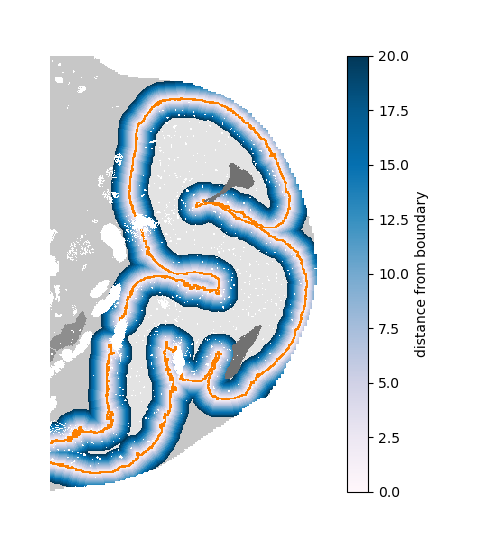

In [50]:
plt.close("all")
plot_boundary_distances(anndata.obs, 
                    boundary_dist_key="boundary_dist_brain_meninges", 
                    verbose=True, 
                    manual_selection_key=None)

## manually select region

In [54]:
def select_region_of_interest(anndata, 
                              set_nan_to_zero=False, 
                              col_name="filtered_annotated", 
                              x_column="x",
                              y_column="y",
                              alpha_background=0.3,
                              lasso_color="red",
                              lasso_linewidth=2,
                              s=0.5):
    """
    manual selection of region of interest
    """
    
    temp = anndata.raw.to_adata()
    test_red = temp.obs[[x_column, y_column, col_name]]
    
    fig, ax = plt.subplots()
    
    levels, categories = pd.factorize(test_red[col_name])
    colors = [plt.cm.tab10(i) for i in levels] # using the "tab10" colormap
    handles = [Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(categories)]
    
    im = ax.scatter(test_red[x_column], test_red[y_column]*-1, c=colors, s=s)
    plt.gca().set(xlabel='', ylabel='', title='select boundary region')
    plt.gca().set_aspect("equal")
    plt.tick_params(axis='x',
                    which='both',
                    bottom=False,
                    top=False,
                    labelbottom=False) 
    plt.tick_params(axis='y',
                    which='both',
                    bottom=False,
                    top=False,
                    labelbottom=False) 
    #plt.legend(handles=handles, title='type of tissue')

    selector = SelectFromCollection(ax, 
                                    im,
                                    alpha_background=alpha_background,
                                    lasso_color=lasso_color,
                                    lasso_linewidth=lasso_linewidth)
    plt.show()
    
    return selector

class SelectFromCollection:
    # based on https://matplotlib.org/stable/gallery/widgets/polygon_selector_demo.html
    
    def __init__(self, 
                 ax, 
                 collection, 
                 alpha_background=0.3,
                 lasso_color="red",
                 lasso_linewidth=2
                ):
        self.canvas = ax.figure.canvas
        self.collection = collection
        self.alpha_other = alpha_background
        
        self.xys = collection.get_offsets()
        self.Npts = len(self.xys)
        
        # Ensure that we have separate colors for each object
        self.fc = collection.get_facecolors()
        if len(self.fc) == 0:
            raise ValueError('Collection must have a facecolor')
        elif len(self.fc) == 1:
            self.fc = np.tile(self.fc, (self.Npts, 1))

        
        self.lasso = LassoSelector(ax, 
                                   onselect=self.onselect,
                                   props={'color': lasso_color, 'linewidth': lasso_linewidth, 'alpha': 1})
        self.ind = []
    
    def onselect(self, verts):
        path = Path(verts)
        self.ind = np.nonzero(path.contains_points(self.xys))[0]
        self.fc[:, -1] = self.alpha_other
        self.fc[self.ind, -1] = 1
        self.collection.set_facecolors(self.fc)
        self.canvas.draw_idle()
    
    def disconnect(self):
        self.lasso.disconnect_events()
        self.fc[:, -1] = 1
        self.collection.set_facecolors(self.fc)
        self.canvas.draw_idle()


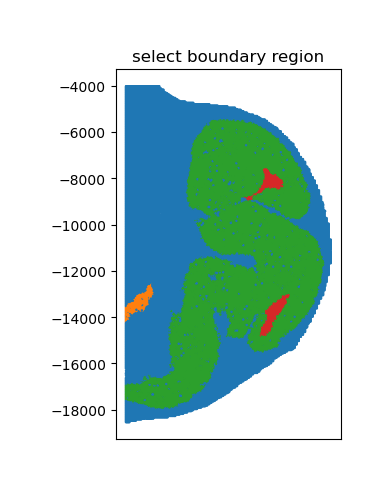

In [58]:
%matplotlib widget

selection = select_region_of_interest(anndata, 
                                      set_nan_to_zero=False, 
                                      s=3,
                                      col_name="filtered_annotated",
                                      alpha_background=0.1,
                                      lasso_color="red",
                                      lasso_linewidth=2)

In [74]:
def set_manually_selected_region(obs, 
                                 selector, 
                                 col_name="manually_selected"):

    """
    creates column in anndata.obs with manually selected bins
    """
    
    obs[col_name] = False
    for elem in selector.xys[selector.ind]:
        obs.loc[(obs['x'] == elem[0]) & (obs['y'] == elem[1]*-1),col_name] = True
    
    return obs

def create_dist_gene_table(anndata, 
                           relevant_clusters, 
                           raw_counts_layer="raw_counts", 
                           boundary_dist_key="boundary_dist", 
                           normalization_target_sum=1e6, 
                           filepath=None, 
                           masking_key=None,
                           filtered_clusters_key="filtered_annotated"):
    """
    create workflow output
    write output tsv
    """
    
    anndata_raw = anndata.raw.to_adata()
    anndata_raw.layers[raw_counts_layer] = copy.deepcopy(anndata_raw.X)

    ###
    anndata_raw.obs[boundary_dist_key] = np.where(anndata_raw.obs[filtered_clusters_key] == relevant_clusters[0],
                                              anndata_raw.obs[boundary_dist_key],
                                              anndata_raw.obs[boundary_dist_key]*-1)
    ###
    
    sc.pp.normalize_total(anndata_raw, target_sum=normalization_target_sum)
    anndata_raw.layers["normalized"] = copy.deepcopy(anndata_raw.X)
    dist_gene_df, stdev_gene_df = calculate_dist_gene_df(anndata_raw, 
                                                         relevant_clusters, 
                                                         boundary_dist_key=boundary_dist_key,
                                                         masking_key=masking_key)
    
    stdev_gene_df = stdev_gene_df.add_suffix("__stdev") # make columns distinguishable by adding __stdev suffic
    conc = pd.concat([dist_gene_df, stdev_gene_df], axis=1)
    
    new_col_order = [x for x in itertools.chain.from_iterable(itertools.zip_longest(dist_gene_df.columns, stdev_gene_df.columns)) if x] # adapted from # https://stackoverflow.com/questions/3678869/pythonic-way-to-combine-interleave-interlace-intertwine-two-lists-in-an-alte
    conc = conc[new_col_order] # sort columns, so that expression values and stdev values are always neighboring columns
    
    if filepath is not None:
        with open(filepath, 'w') as f:
            f.write(f'# {relevant_clusters[1]}: negative distances, {relevant_clusters[0]}: positive distances\n')
            conc.to_csv(f, 
                                sep="\t",
                                header=True,
                                decimal=".")
        f.close()
    
    return conc


def calculate_dist_gene_df(anndata_raw, 
                           relevant_clusters, 
                           boundary_dist_key="boundary_dist", 
                           filtered_clusters_key="filtered_annotated", 
                           bin_count_key = "bin_count",
                           masking_key=None):

    """
    calculates average expression at the different distances
    helper function for create_dist_gene_table
    """
    
    if len(relevant_clusters) < 2 < len(relevant_clusters):
        raise ValueError("Wrong number of relevant clusters!")
    obs = copy.deepcopy(anndata_raw.obs)
    if masking_key != None:
        obs[boundary_dist_key] = np.where(obs[masking_key] == True,
                                          obs[boundary_dist_key],
                                          np.nan)
        
    obs[boundary_dist_key] = obs[boundary_dist_key].astype("category")
    dist_gene_df = pd.DataFrame(columns=anndata_raw.var_names, index=obs[boundary_dist_key].cat.categories)
    stdev_gene_df = pd.DataFrame(columns=anndata_raw.var_names, index=obs[boundary_dist_key].cat.categories)
    
    obs[boundary_dist_key] = obs[boundary_dist_key].astype("category")
    anndata_raw.obs = obs
    
    for distance in anndata_raw.obs[boundary_dist_key].astype("category").cat.categories:
        dist_gene_df.loc[distance] = anndata_raw[anndata_raw.obs[boundary_dist_key].isin([distance]),:].layers["normalized"].mean(axis=0)
        x = anndata_raw[anndata_raw.obs[boundary_dist_key].isin([distance]),:].layers["normalized"].todense()
        stdev_gene_df.loc[distance] = np.median(np.absolute(x - np.median(x, axis=0)),axis=0)
    dist_gene_df.index = dist_gene_df.index.astype("int")
    stdev_gene_df.index = stdev_gene_df.index.astype("int")
    
    dist_gene_df[bin_count_key] = anndata_raw.obs[boundary_dist_key].value_counts()
    
    column_to_move = dist_gene_df.pop(bin_count_key)
    dist_gene_df.insert(0, bin_count_key, column_to_move)
    
    return dist_gene_df, stdev_gene_df

AnnData object with n_obs × n_vars = 111122 × 42126
    obs: 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'leiden', 'leiden_annotated', 'orig.ident', 'x', 'y', 'region_num_key', 'filtered_annotated', 'boundary_dist_brain_meninges', 'dorpal_men'
    var: 'n_cells', 'n_counts', 'mean_umi'
    uns: 'bin_type', 'bin_size', 'resolution', 'sn'
    obsm: 'spatial'

In [81]:
%matplotlib inline

rel_clusters = ["brain", "meninges"]
boundary_dist_key = "boundary_dist_brain_meninges"
selection_name = "dorpal_men"

anndata.obs = set_manually_selected_region(anndata.obs, 
                                           selection, 
                                           col_name=selection_name)

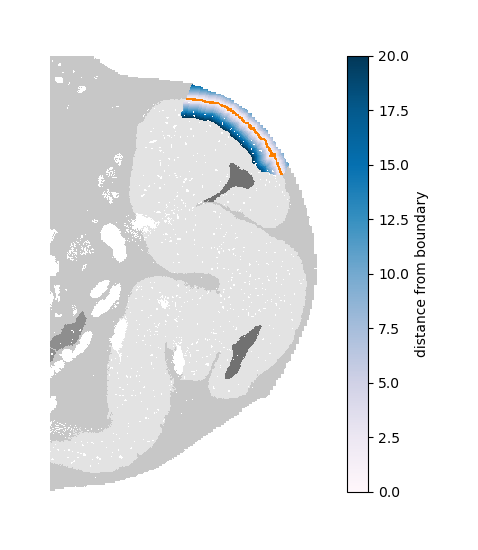

In [83]:
plot_boundary_distances(anndata.obs, 
                        boundary_dist_key=boundary_dist_key, 
                        verbose=True, 
                        manual_selection_key=selection_name,
                        highlight_boundary=True)
plt.show()

dist_gene_df = create_dist_gene_table(anndata,
                                      rel_clusters,
                                      raw_counts_layer="raw_counts", 
                                      boundary_dist_key=boundary_dist_key, 
                                      filepath=f"{out_dir}{sample_name}.tsv",
                                      filtered_clusters_key="filtered_annotated",
                                      masking_key=selection_name,
                                      normalization_target_sum=1e4)

In [ ]:
anndata.write(f"{out_dir}{sample_name}_processed_anndata.h5ad")

In [ ]:
f"{out_dir}{boundary_dist_key}_{selection_name}.tsv"